In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


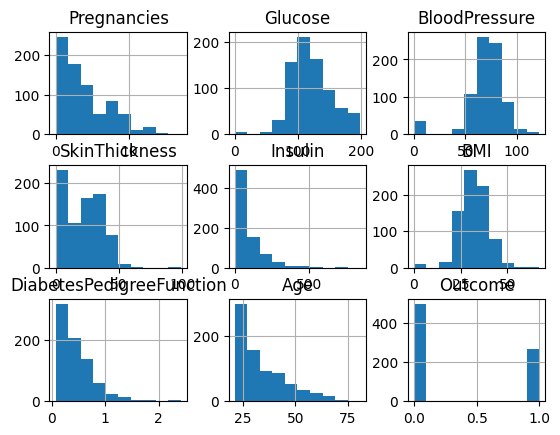

In [4]:
df.hist()
plt.show()

In [5]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [8]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

In [9]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [10]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [11]:
df_scaled = preprocessing.scale(df)

In [12]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [13]:
df_scaled['Outcome'] = df['Outcome']
df = df_scaled

In [14]:
df.describe().loc[['mean', 'std','max'],].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.54,4.1,7.95,8.13,5.04,5.88,4.06,1.00


In [15]:
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [18]:
final_result = {}

In [19]:
model_1 = Sequential([
    Dense(units=16, activation='relu', input_dim=8),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# model summary
model_1.summary()

# Train the model for 100 epochs
history_mod1 = model_1.fit(X_train, y_train, epochs=100)

train_score1 = model_1.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (train_score1[1]*100))

val_score1 = model_1.evaluate(X_val, y_val)
print("Validation Accuracy: %.2f%%\n" % (val_score1[1]*100))

test_score1 = model_1.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (test_score1[1]*100))


final_result['Model 1 Training Accuracy'] = round(train_score1[1]*100,2)
final_result['Model 1 Validation Accuracy'] = round(val_score1[1]*100,2)
final_result['Model 1 Testing Accuracy'] = round(test_score1[1]*100,2)

Metal device set to: Apple M2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


2023-09-19 10:06:15.991449: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


16/16 [==============================] - 0s 9ms/step - loss: 0.5957 - accuracy: 0.7149
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5245 - accuracy: 0.7475
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4970 - accuracy: 0.7495
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4852 - accuracy: 0.7495
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4781 - accuracy: 0.7576
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4749 - accuracy: 0.7576
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4731 - accuracy: 0.7597
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4716 - accuracy: 0.7617
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4701 - accuracy: 0.7597
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4699 - accuracy: 0.7617
Epoch 11/100
16/16 [=

16/16 [==============================] - 0s 5ms/step - loss: 0.4694 - accuracy: 0.7556
Epoch 84/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4739 - accuracy: 0.7637
Epoch 85/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4677 - accuracy: 0.7637
Epoch 86/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4721 - accuracy: 0.7556
Epoch 87/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4692 - accuracy: 0.7617
Epoch 88/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4691 - accuracy: 0.7678
Epoch 89/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4726 - accuracy: 0.7658
Epoch 90/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4707 - accuracy: 0.7617
Epoch 91/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4829 - accuracy: 0.7576
Epoch 92/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4758 - accuracy: 0.7597
Epoch 93/100


In [20]:
model_2 = Sequential([
    Dense(units=16, activation='relu', input_dim=8),
    Dense(units=32, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# model summary
model_2.summary()

# Train the model for 100 epochs
history_mod2 = model_2.fit(X_train, y_train, epochs=100)

train_score2 = model_2.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (train_score2[1]*100))

val_score2 = model_2.evaluate(X_val, y_val)
print("Validation Accuracy: %.2f%%\n" % (val_score2[1]*100))

test_score2 = model_2.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (test_score2[1]*100))


final_result['Model 2 Training Accuracy'] = round(train_score2[1]*100,2)
final_result['Model 2 Validation Accuracy'] = round(val_score2[1]*100,2)
final_result['Model 2 Testing Accuracy'] = round(test_score2[1]*100,2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                144       
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,865
Trainable params: 2,865
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6857 - accuracy: 0.5825
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5404 - acc

16/16 [==============================] - 0s 5ms/step - loss: 0.9405 - accuracy: 0.7271
Epoch 74/100
16/16 [==============================] - 0s 5ms/step - loss: 0.9627 - accuracy: 0.7108
Epoch 75/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6210 - accuracy: 0.7312
Epoch 76/100
16/16 [==============================] - 0s 5ms/step - loss: 0.7382 - accuracy: 0.7067
Epoch 77/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5711 - accuracy: 0.7678
Epoch 78/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6844 - accuracy: 0.7332
Epoch 79/100
16/16 [==============================] - 0s 5ms/step - loss: 0.9519 - accuracy: 0.7454
Epoch 80/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6514 - accuracy: 0.7597
Epoch 81/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4948 - accuracy: 0.7475
Epoch 82/100
16/16 [==============================] - 0s 5ms/step - loss: 0.7345 - accuracy: 0.7189
Epoch 83/100


In [21]:
model_3 = Sequential([
    Dense(units=16, activation='relu', input_dim=8),
    Dense(units=32, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# model summary
model_3.summary()

# Train the model for 100 epochs
history_mod3 = model_3.fit(X_train, y_train, epochs=100)

train_score3 = model_3.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (train_score3[1]*100))

val_score3 = model_3.evaluate(X_val, y_val)
print("Validation Accuracy: %.2f%%\n" % (val_score3[1]*100))

test_score3 = model_3.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (test_score3[1]*100))


final_result['Model 3 Training Accuracy'] = round(train_score3[1]*100,2)
final_result['Model 3 Validation Accuracy'] = round(val_score3[1]*100,2)
final_result['Model 3 Testing Accuracy'] = round(test_score3[1]*100,2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                144       
                                                                 
 dense_8 (Dense)             (None, 32)                544       
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 11,249
Trainable params: 11,249
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
16/16 [==============================]

Epoch 72/100
16/16 [==============================] - 0s 5ms/step - loss: 33.4233 - accuracy: 0.6843
Epoch 73/100
16/16 [==============================] - 0s 5ms/step - loss: 74.7424 - accuracy: 0.6701
Epoch 74/100
16/16 [==============================] - 0s 5ms/step - loss: 50.9680 - accuracy: 0.6741
Epoch 75/100
16/16 [==============================] - 0s 5ms/step - loss: 101.7937 - accuracy: 0.6415
Epoch 76/100
16/16 [==============================] - 0s 5ms/step - loss: 20.5676 - accuracy: 0.6640
Epoch 77/100
16/16 [==============================] - 0s 5ms/step - loss: 55.6086 - accuracy: 0.6212
Epoch 78/100
16/16 [==============================] - 0s 5ms/step - loss: 131.8150 - accuracy: 0.6640
Epoch 79/100
16/16 [==============================] - 0s 5ms/step - loss: 96.5184 - accuracy: 0.6497
Epoch 80/100
16/16 [==============================] - 0s 5ms/step - loss: 56.2542 - accuracy: 0.6925
Epoch 81/100
16/16 [==============================] - 0s 5ms/step - loss: 55.5567 - accur

In [22]:
final_result

{'Model 1 Training Accuracy': 76.58,
 'Model 1 Validation Accuracy': 78.86,
 'Model 1 Testing Accuracy': 74.68,
 'Model 2 Training Accuracy': 70.47,
 'Model 2 Validation Accuracy': 70.73,
 'Model 2 Testing Accuracy': 71.43,
 'Model 3 Training Accuracy': 75.56,
 'Model 3 Validation Accuracy': 73.17,
 'Model 3 Testing Accuracy': 70.13}

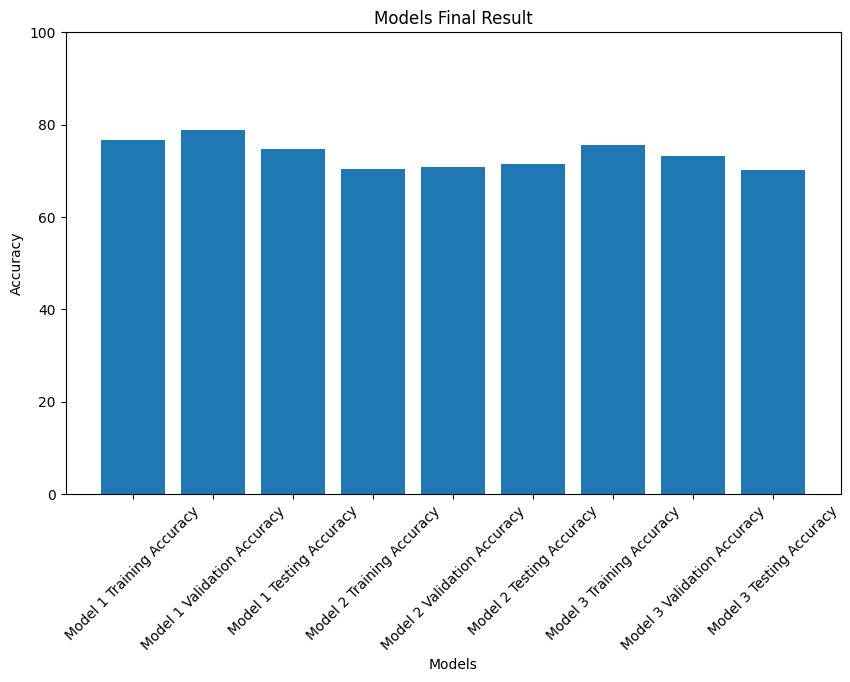

In [23]:
# Plotting final result
names = list(final_result.keys())
values = list(final_result.values())

plt.figure(figsize=(10, 6))
plt.bar(range(len(final_result)), values, tick_label=names)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Models Final Result')
plt.xticks(rotation=45)
plt.ylim(0, 100.0)  # Set the y-axis limit to 0 to 1
plt.show()